# Análisis de medias y varianzas

Se pretende observar la efectividad de observar las medias y varianzas de las imagenes para ser utilizadas como criterio de identificación de productos. Primero se carga los datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import utils

current_path = os.getcwd()
samples_rel_path = "../samples"

samples_path = os.path.join(current_path, samples_rel_path)

Es importante destacar que las medias y desviaciones son calculadas utilizando las imagenes en el espacio LAB, donde se calcula solamente sobre los canales A y B.

In [2]:
meanstd = pd.read_csv("csv/meanstd.csv", sep=';')

In [3]:
meanstd_diff = pd.read_csv("csv/meanstd_diff.csv", sep=';')

In [4]:
print(meanstd.head(10))

   group_num  num_product    mean_0    mean_1  stddev_0  stddev_1
0          0            1  0.523155  0.602028  0.157303  0.241916
1          0            2  0.513648  0.607590  0.148738  0.248892
2          1            1  0.525698  0.598066  0.124901  0.262777
3          1            2  0.523224  0.600421  0.127882  0.264742
4          2            1  0.517106  0.627266  0.143064  0.226480
5          2            2  0.522027  0.620666  0.152333  0.236667
6          3            1  0.555804  0.592132  0.080716  0.097923
7          3            2  0.556883  0.605135  0.086450  0.101275
8          4            1  0.555142  0.601934  0.120357  0.216684
9          4            2  0.544233  0.606182  0.115953  0.202327


In [5]:
print(meanstd_diff.head(10))

   group_num  num_product    mean_0    mean_1  stddev_0  stddev_1
0          0            1  0.623269  0.619468  0.147298  0.111478
1          0            2  0.658674  0.427527  0.147702  0.262427
2          1            1  0.474351  0.678255  0.185848  0.165761
3          1            2  0.496788  0.654561  0.147000  0.238406
4          2            1  0.548854  0.594888  0.201716  0.109388
5          2            2  0.468650  0.622015  0.062371  0.164427
6          3            1  0.561699  0.566669  0.135527  0.125035
7          3            2  0.536865  0.607959  0.105844  0.128707
8          4            1  0.522310  0.520479  0.119044  0.208902
9          4            2  0.526810  0.498581  0.150966  0.245562


## Comparación medias productos iguales vs productos diferentes.

### Productos Iguales

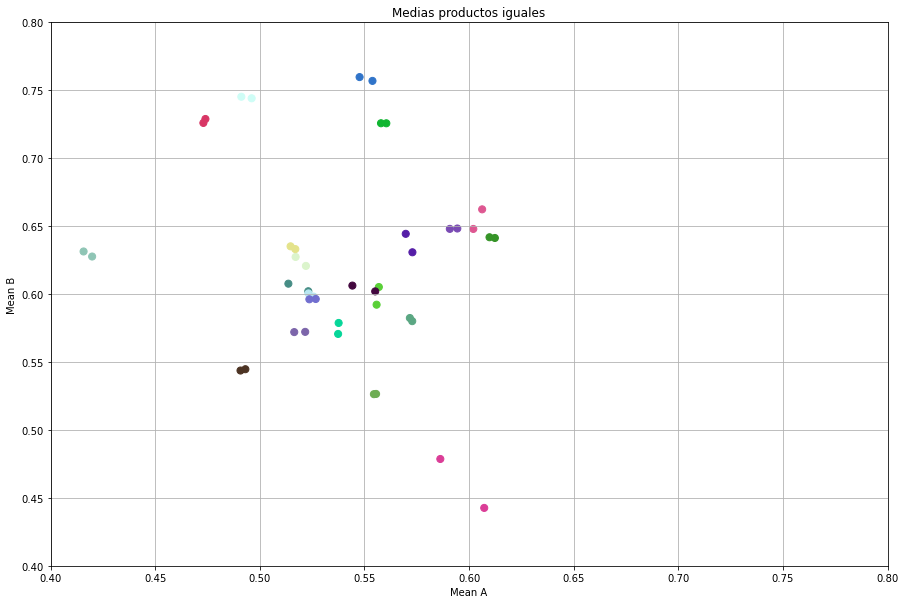

In [6]:
utils.plot_means(meanstd, "Medias productos iguales", [0.4, 0.8], [0.4, 0.8], 'Mean A', 'Mean B')

De la gráfica anterior cada color representa un producto, dos colores iguales representa dos productos iguales

### Productos Diferentes

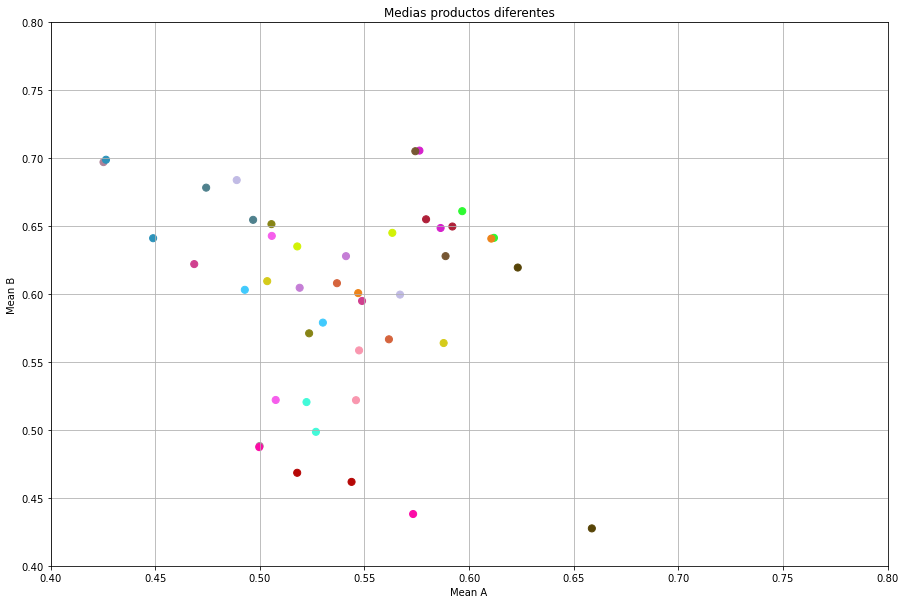

In [7]:
utils.plot_means(meanstd_diff, "Medias productos diferentes", [0.4, 0.8], [0.4, 0.8], 'Mean A', 'Mean B')

## Comparación de desviaciones en productos iguales vs productos diferentes.

### Productos Iguales

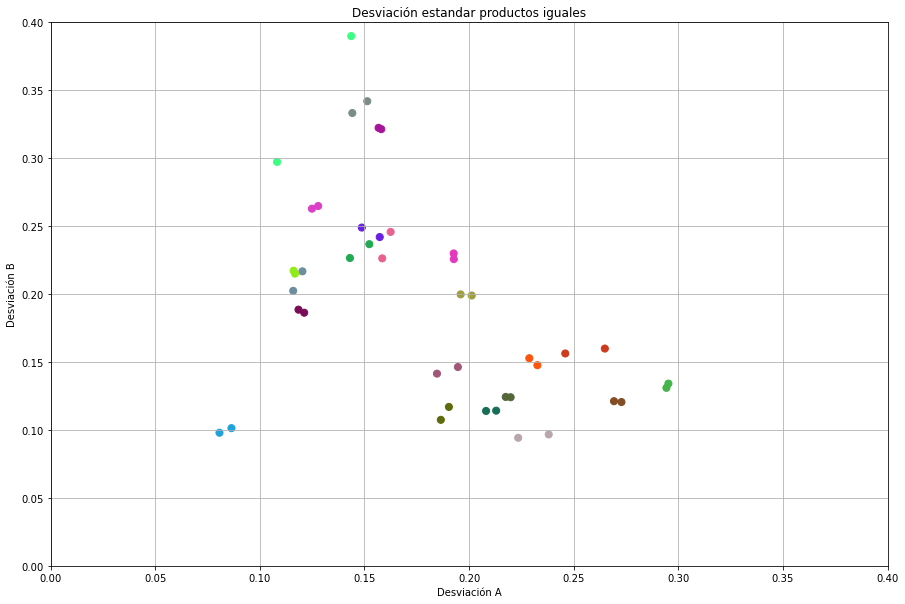

In [8]:
utils.plot_stdDev(meanstd, "Desviación estandar productos iguales", [0, 0.4], [0, 0.4], "Desviación A", "Desviación B")

### Productos Diferentes

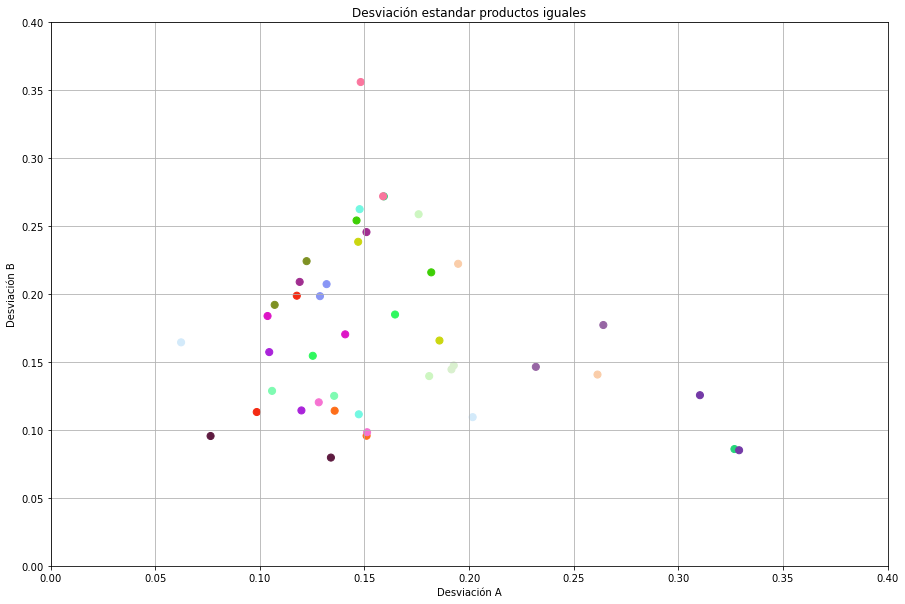

In [9]:
utils.plot_stdDev(meanstd_diff, "Desviación estandar productos iguales", [0, 0.4], [0, 0.4], "Desviación A", "Desviación B")

## Variables cruzadas productos iguales

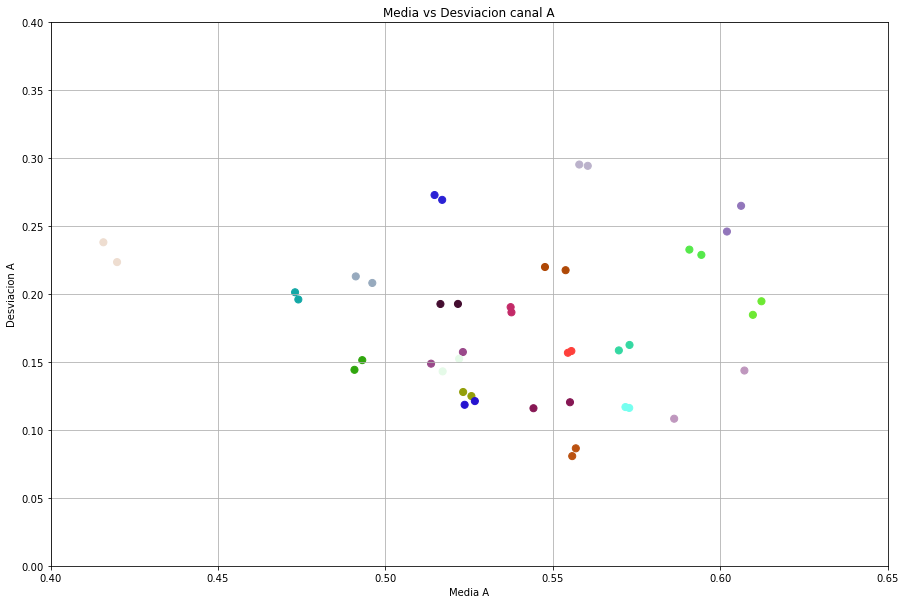

In [10]:
utils.plot_generic(meanstd, meanstd["mean_0"], 
    meanstd["stddev_0"], "Media vs Desviacion canal A", 
    [0.4, 0.65], [0, 0.4], "Media A", "Desviacion A")

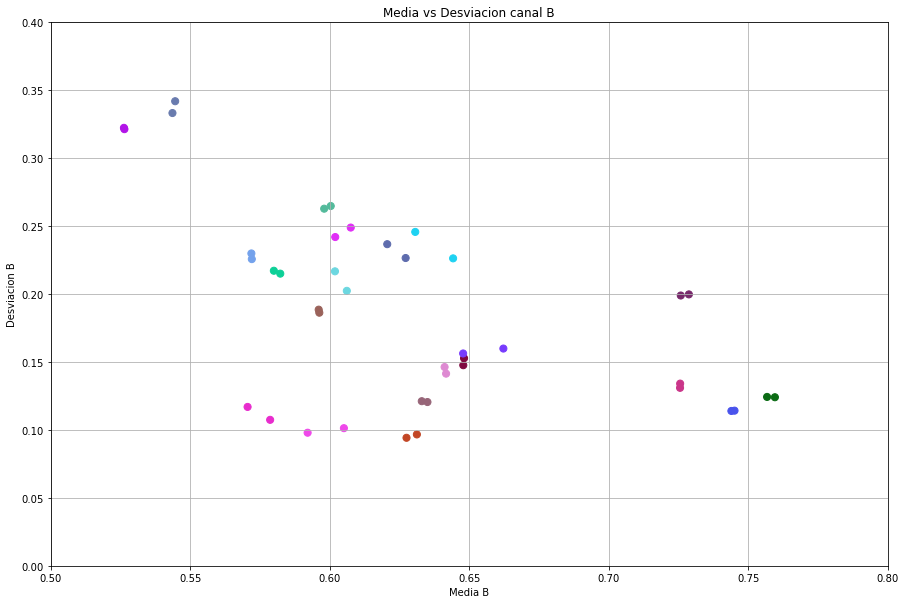

In [11]:
utils.plot_generic(meanstd, meanstd["mean_1"], 
    meanstd["stddev_1"], "Media vs Desviacion canal B", 
    [0.5, 0.8], [0, 0.4], "Media B", "Desviacion B")

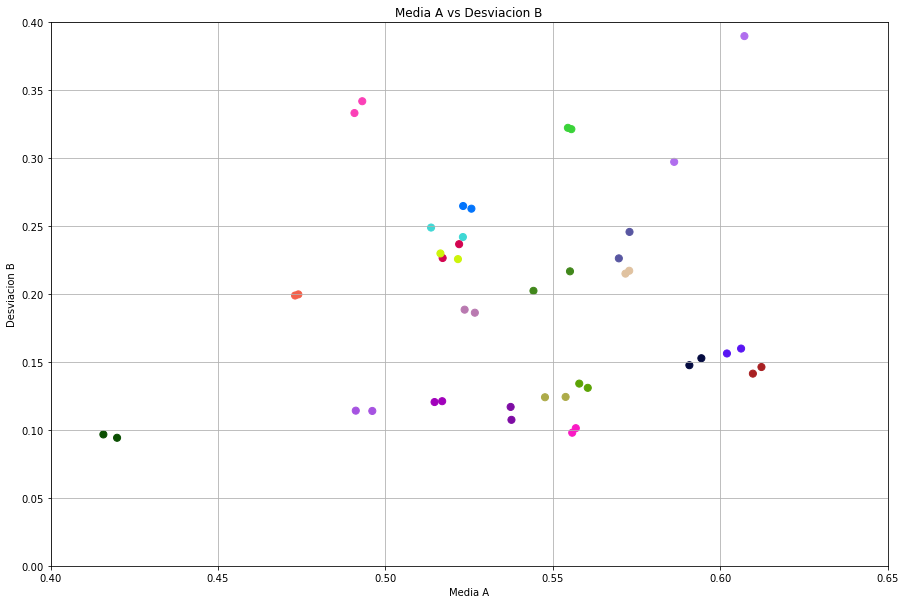

In [12]:
utils.plot_generic(meanstd, meanstd["mean_0"], 
    meanstd["stddev_1"], "Media A vs Desviacion B", 
    [0.4, 0.65], [0, 0.4], "Media A", "Desviacion B")

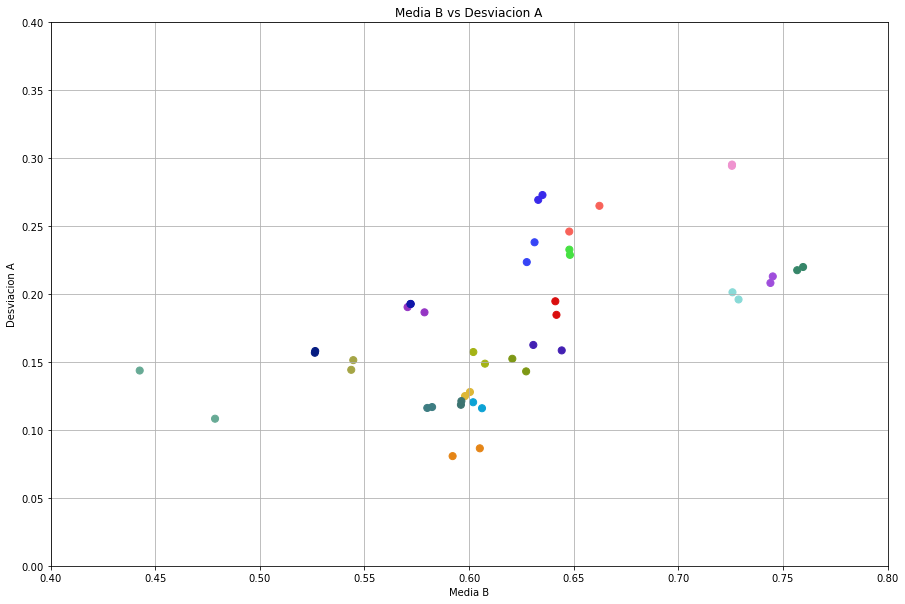

In [13]:
utils.plot_generic(meanstd, meanstd["mean_1"], 
    meanstd["stddev_0"], "Media B vs Desviacion A", 
    [0.4, 0.8], [0, 0.4], "Media B", "Desviacion A")

## Variables cruzadas productos diferentes

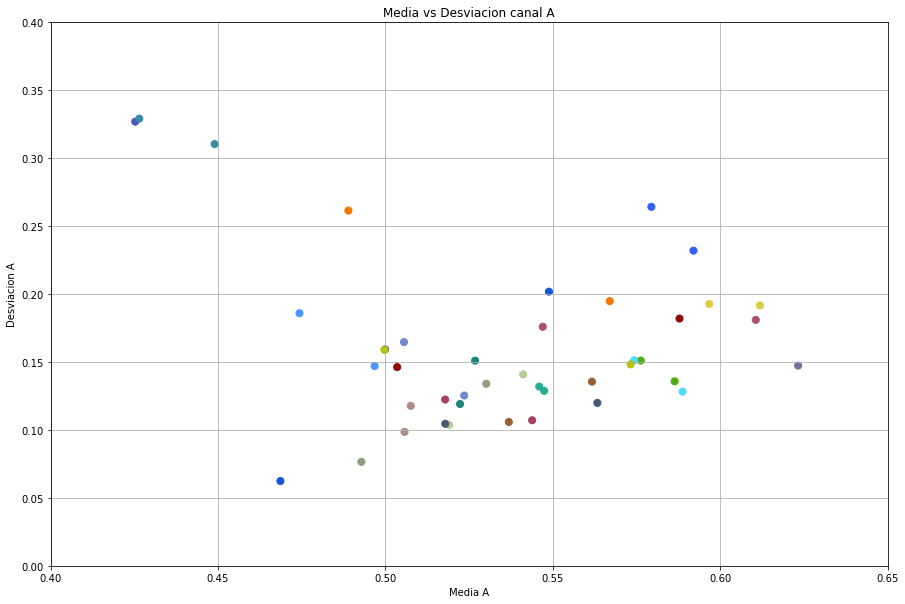

In [14]:
utils.plot_generic(meanstd_diff, meanstd_diff["mean_0"], 
    meanstd_diff["stddev_0"], "Media vs Desviacion canal A", 
    [0.4, 0.65], [0, 0.4], "Media A", "Desviacion A")

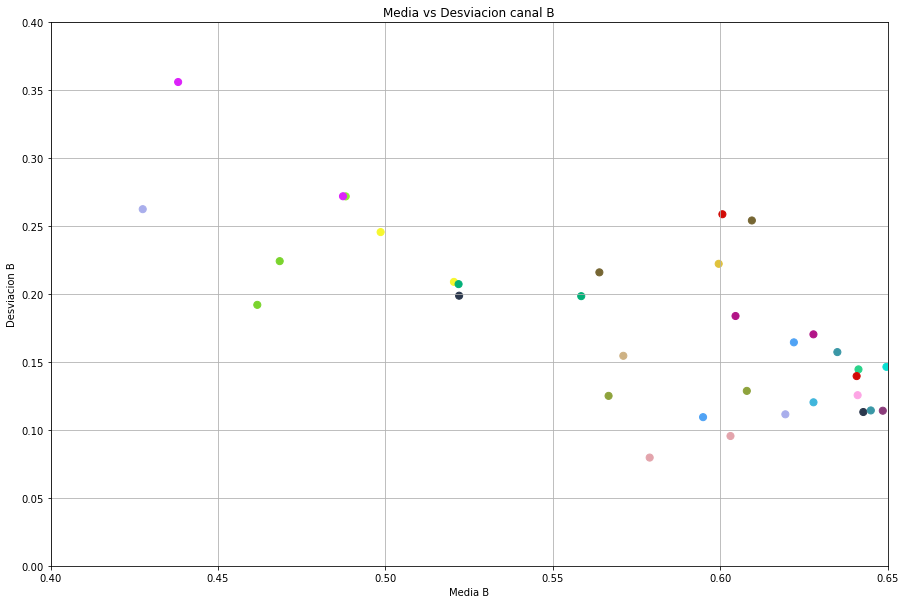

In [15]:
utils.plot_generic(meanstd_diff, meanstd_diff["mean_1"], 
    meanstd_diff["stddev_1"], "Media vs Desviacion canal B", 
    [0.4, 0.65], [0, 0.4], "Media B", "Desviacion B")

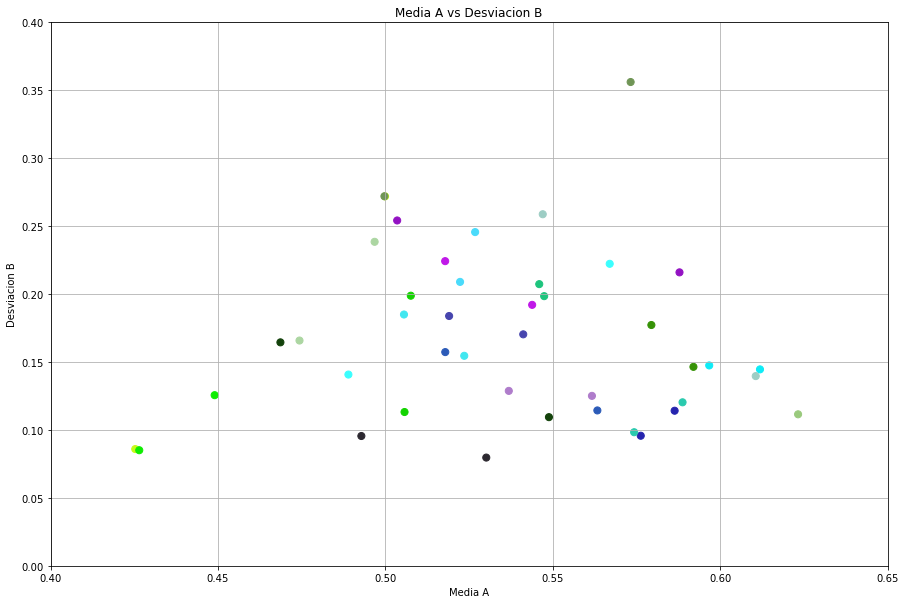

In [16]:
utils.plot_generic(meanstd_diff, meanstd_diff["mean_0"], 
    meanstd_diff["stddev_1"], "Media A vs Desviacion B", 
    [0.4, 0.65], [0, 0.4], "Media A", "Desviacion B")

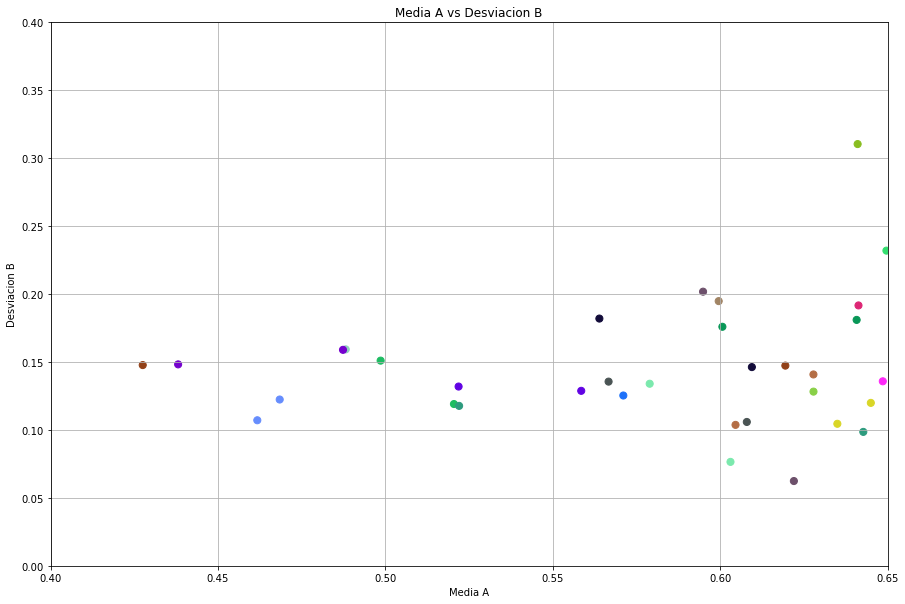

In [17]:
utils.plot_generic(meanstd_diff, meanstd_diff["mean_1"], 
    meanstd_diff["stddev_0"], "Media A vs Desviacion B", 
    [0.4, 0.65], [0, 0.4], "Media A", "Desviacion B")

## Conclusiones

Observando la comparación de variables, no se puede fiar de manera confiable las medias y varianzas para distinguir diferentes productos puesto que hay un sobrelape en algunos casos, de productos diferentes teniendo medias similares y varianzas similares. No obstante, hay una tendencia clara en donde productos iguales tienen medias y varianzas muy cercanas entre ellas, mientras que para productos diferentes la variabilidad es mayor: en algunos casos las medias y varianzas son muy distantes y en otros casos no. Esto sugiere que combinando estas característas junto a feature Matching y distancia de histograma, puede otorgar información adicional para validación de un producto.

## Trabajo futuro

Puede ser de información bastante útil para la desición del criterio, observar la correlación existente entre las medias, varianzas y distancia de Bhattacharya entre productos iguales y diferentes.